# CSE 7324 Lab 1: Exploring Table Data
### Thomas Adams, Suleiman Hijazeen, Nancy Le, Andrew Whigham

### Business Understanding

### Data Understanding

In [13]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [9]:
df = pd.read_csv("global-carbon-dioxide-emissions-by-sector-gg-co.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 12 columns):
Entity                              5440 non-null object
Code                                4481 non-null object
Year                                5440 non-null int64
Transport                           5253 non-null float64
Forestry                            5356 non-null float64
Energy                              5440 non-null float64
Other sources                       5440 non-null int64
Agriculture, Land Use & Forestry    5419 non-null float64
Waste                               5430 non-null float64
Residential & commercial            5430 non-null float64
Industry                            5430 non-null float64
Agriculture                         5419 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 510.1+ KB
None
        Entity Code  Year  Transport  Forestry    Energy  Other sources  \
0  Afghanistan  AFG  1990   607.2770       0.0  277.4122   

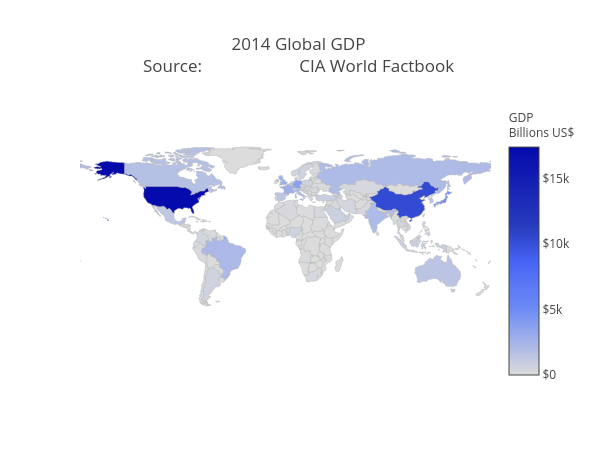

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
       type = 'choropleth',
       locations = df['CODE'],
       z = df['GDP (BILLIONS)'],
       text = df['COUNTRY'],
       colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
           [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
       autocolorscale = False,
       reversescale = True,
       marker = dict(
           line = dict (
               color = 'rgb(180,180,180)',
               width = 0.5
           ) ),
       colorbar = dict(
           autotick = False,
           tickprefix = '$',
           title = 'GDP<br>Billions US$'),
     ) ]

layout = dict(
   title = '2014 Global GDP<br>Source:\
           <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
           CIA World Factbook</a>',
   geo = dict(
       showframe = False,
       showcoastlines = False,
       projection = dict(
           type = 'Mercator'
       )
   )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

### Data Visualization

### Additional Analysis
# TODO t-SNE analysis